---------

# **_Tutorial II : Compute phaseogram and spectra_**

------

In VHE pulsar analysis we usually try to obtain, mainly, two results from the DL3 files:

- **Phaseogram**: distribution of event phases. In LST-1 the phaseogram and all the statistics associated with it can be obtained using the ptimin_ana.phaseogram.PulsarAnalysis object (see section 2) and the DL2/DL3 files.
  
- **SED**: this can be done with some functions of gammapy. We need the DL3 files. The ptiming_ana.spectal module containes functions and objects that allow us to compute the spectra of pulsars. These objects call internally to gammapy, but the user does not need to know how it works (see Section 3).

  

----------

## **0. Import modules needed**

In [1]:
from ptiming_ana.phaseogram import *
from lstchain.io.io import dl2_params_lstcam_key,dl2_params_src_dep_lstcam_key
from astropy.io import fits
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np

In [2]:
import lstchain
import gammapy
import pandas

print(f'Gammapy version: {gammapy.__version__}')
print(f'lstchain version: {lstchain.__version__}')
print(f'pandas version: {pandas.__version__}')

Gammapy version: 1.1
lstchain version: 0.10.6
pandas version: 2.0.3


In [3]:
# workspace_dir = '/home/francesco.schiavone/lst-analysis-school-2024/pulsar/' #Change with your working directory
workspace_dir = './'

In [4]:
!ls /fefs/aswg/workspace/analysis-school-2024/pulsar/Notebook2/Crab/DL3_pulsar/

FITSIndexWriter.provenance.log	dl3_LST-1.Run02966_pulsar.fits
dl3_LST-1.Run02759_pulsar.fits	dl3_LST-1.Run02967_pulsar.fits
dl3_LST-1.Run02914_pulsar.fits	dl3_LST-1.Run02968_pulsar.fits
dl3_LST-1.Run02919_pulsar.fits	dl3_LST-1.Run02969_pulsar.fits
dl3_LST-1.Run02922_pulsar.fits	dl3_LST-1.Run02970_pulsar.fits
dl3_LST-1.Run02923_pulsar.fits	dl3_LST-1.Run02971_pulsar.fits
dl3_LST-1.Run02924_pulsar.fits	dl3_LST-1.Run02972_pulsar.fits
dl3_LST-1.Run02925_pulsar.fits	dl3_LST-1.Run02973_pulsar.fits
dl3_LST-1.Run02929_pulsar.fits	dl3_LST-1.Run02974_pulsar.fits
dl3_LST-1.Run02930_pulsar.fits	dl3_LST-1.Run02975_pulsar.fits
dl3_LST-1.Run02931_pulsar.fits	dl3_LST-1.Run02976_pulsar.fits
dl3_LST-1.Run02932_pulsar.fits	dl3_LST-1.Run02977_pulsar.fits
dl3_LST-1.Run02933_pulsar.fits	dl3_LST-1.Run02988_pulsar.fits
dl3_LST-1.Run02934_pulsar.fits	dl3_LST-1.Run02989_pulsar.fits
dl3_LST-1.Run02949_pulsar.fits	dl3_LST-1.Run02990_pulsar.fits
dl3_LST-1.Run02950_pulsar.fits	dl3_LST-1.Run02991_pulsar.fits
dl3_LST-

Note that we need the index files!

## **1. Creating a configuration file with the parameters needed**

The configuration file includes all the information needed for the analysis. It is divided in three parts:

- General params: here one can define the directories to the DL3/DL4 files, the source name and coordinates or the ON/OFF phase regions in the phaseogram
- Phaseogram tools: here one can define different tools for the phaseogram computation.
- Spectral tools: here one can define different tools for the SED creation.


 A brief description of each argument can be found inside the configuration file example given in the school repository


**Please make a copy of the configuration file in your workspace if you want to modify it**:

In [5]:
!cp /fefs/aswg/workspace/analysis-school-2024/pulsar/Notebook2/Crab/config.yaml {workspace_dir}

In [6]:
config_path = workspace_dir + 'config.yaml'

In [8]:
!cat $config_path

########
#Configuration file for pulsar analysis using ptiming_ana
#######

###############################################################
##################### CPHASE PARAMS ###########################
###############################################################
cphase_setting:
   tel: lst 
   use_interpolation: True


###############################################################
##################### GENERAL PARAMS ##########################
###############################################################

# -------- FILE DIRECTORY -----------
pulsar_file_dir: '/fefs/aswg/workspace/analysis-school-2024/pulsar/Notebook2/Crab/DL3_pulsar/'
results_output_directory: './output/spectral_results/' #Replace this with your working directory please!!
DL4_directory: './output/OGIP/' #Replace this with your working directory please!!

target:
  name: Crab
  ra: 83.633
  dec: 22.01


# -------- REGIONS ---------

phase_regions:
  Bkg: [0.52,0.87]
  P1: [0,0.026,0.983,1]
  P2: [0.377,0.422]
 

The yaml file can be modified using any editor to include the information for the source. In the given example, the typical parameters for the Crab pulsar are already defined. 

## **2. Create the phaseogram**

### **2.1. Run the code**

Once the configuration file is filled, all the information for the analysis is included there and the user only has to create the object, assign the configuration file to it, and run the analysis:

2024-02-21 15:15:18 INFO   [ptiming_ana.phaseogram.pulsar_analysis] Creating directory: ./output/phaseogram_results
2024-02-21 15:15:18 INFO   [ptiming_ana.phaseogram.pulsar_analysis] Initializing...
2024-02-21 15:15:18 INFO   [ptiming_ana.phaseogram.read_events] Reading DL3 data files
2024-02-21 15:15:18 INFO   [ptiming_ana.phaseogram.read_events] Reading run number 2914
2024-02-21 15:15:18 INFO   [gammapy.data.data_store] Observations selected: 1 out of 1.
2024-02-21 15:15:19 INFO   [ptiming_ana.phaseogram.read_events] Reading run number 2925
2024-02-21 15:15:19 INFO   [gammapy.data.data_store] Observations selected: 1 out of 1.
2024-02-21 15:15:19 INFO   [ptiming_ana.phaseogram.read_events] Reading run number 2929
2024-02-21 15:15:19 INFO   [gammapy.data.data_store] Observations selected: 1 out of 1.
2024-02-21 15:15:19 INFO   [ptiming_ana.phaseogram.read_events] Reading run number 2930
2024-02-21 15:15:19 INFO   [gammapy.data.data_store] Observations selected: 1 out of 1.
2024-02-2

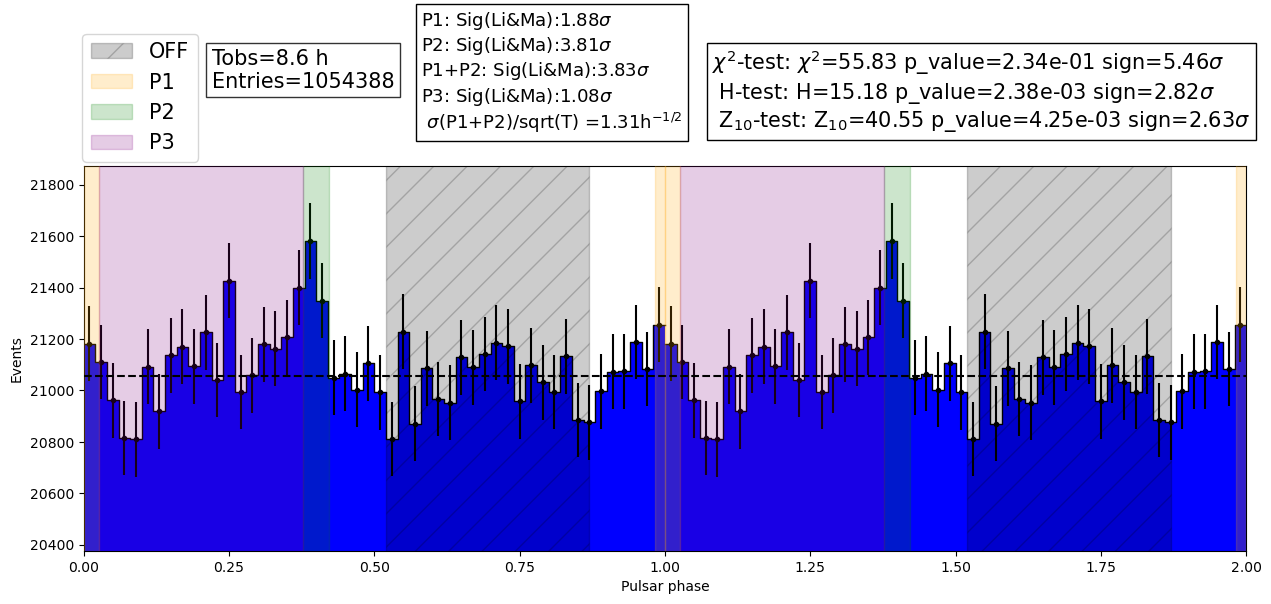

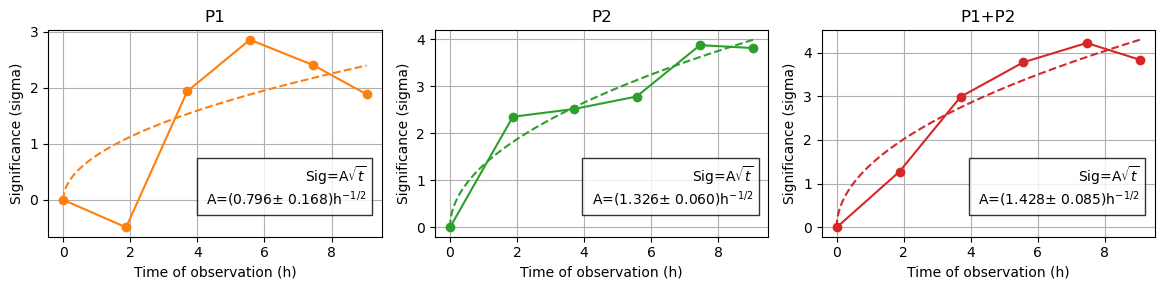

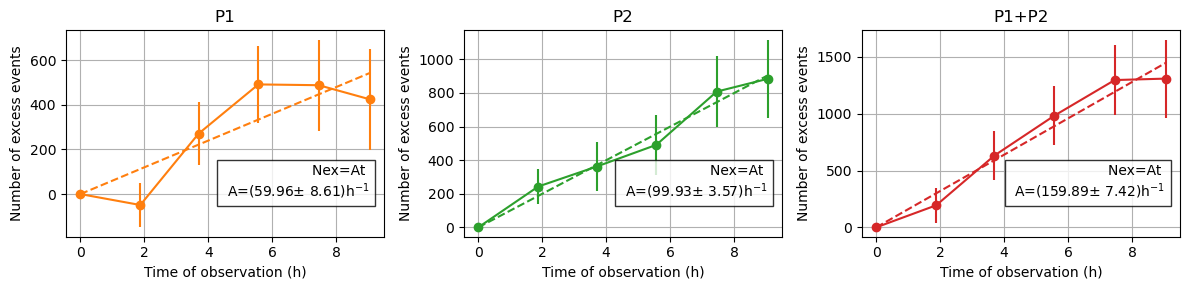

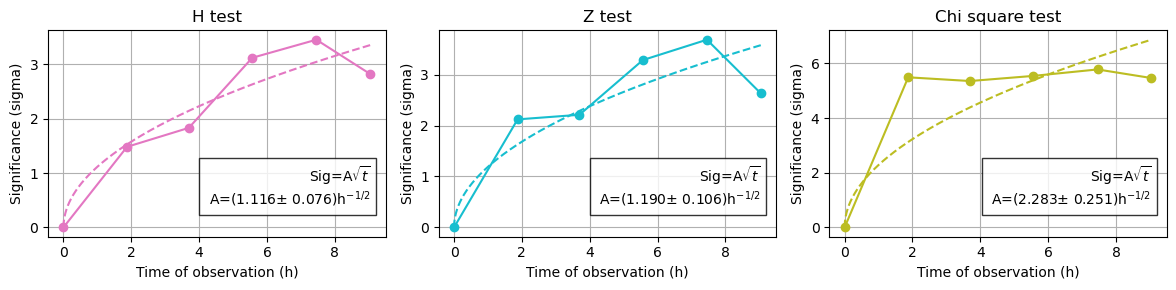

/fefs/aswg/software/virtual_env/ctasoft/PulsarTimingAnalysis/ptiming_ana/phaseogram/penergy_analysis.py:352: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/fefs/aswg/software/virtual_env/ctasoft/PulsarTimingAnalysis/ptiming_ana/phaseogram/penergy_analysis.py:504: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/fefs/aswg/software/virtual_env/ctasoft/PulsarTimingAnalysis/ptiming_ana/phaseogram/pulsar_analysis.py:467: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


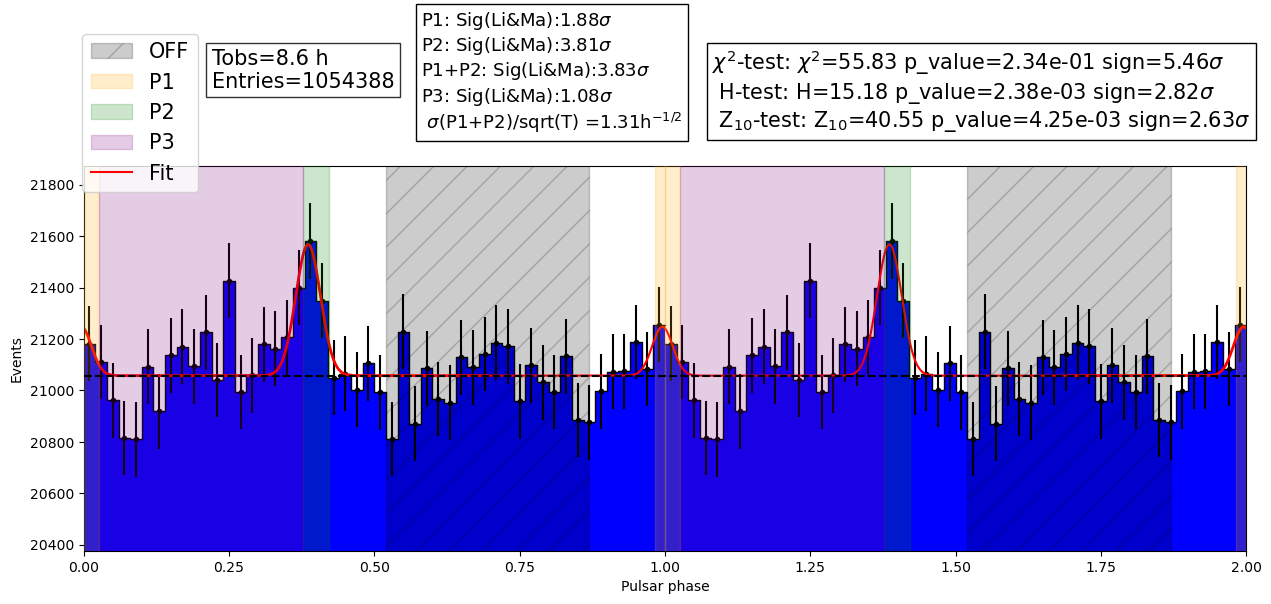

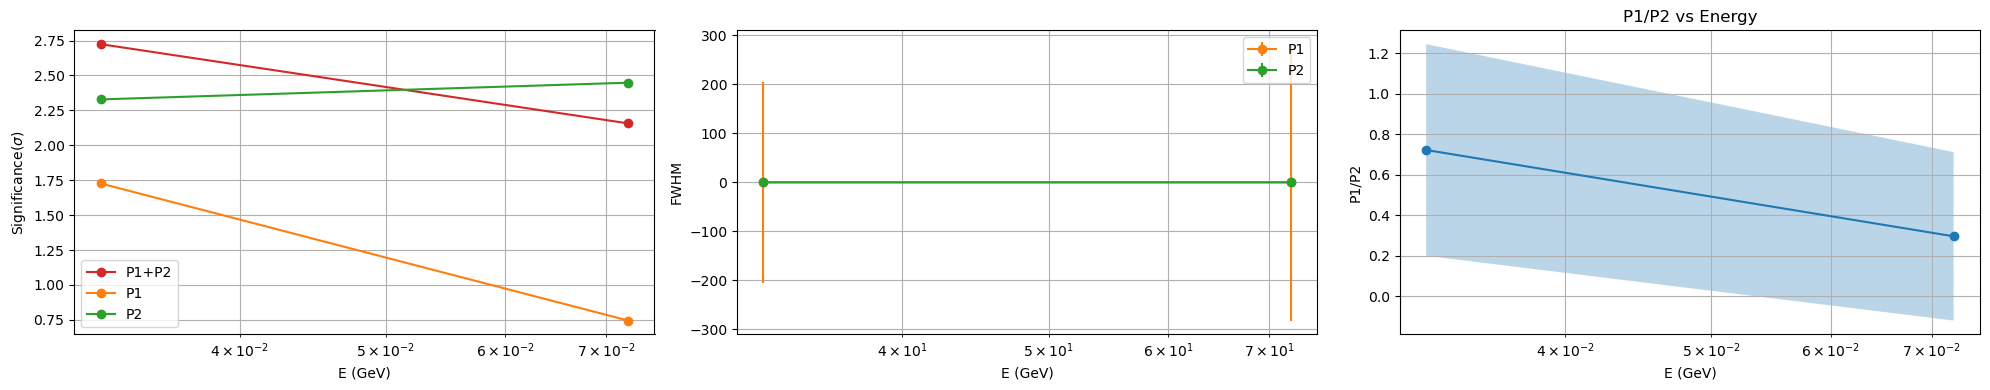

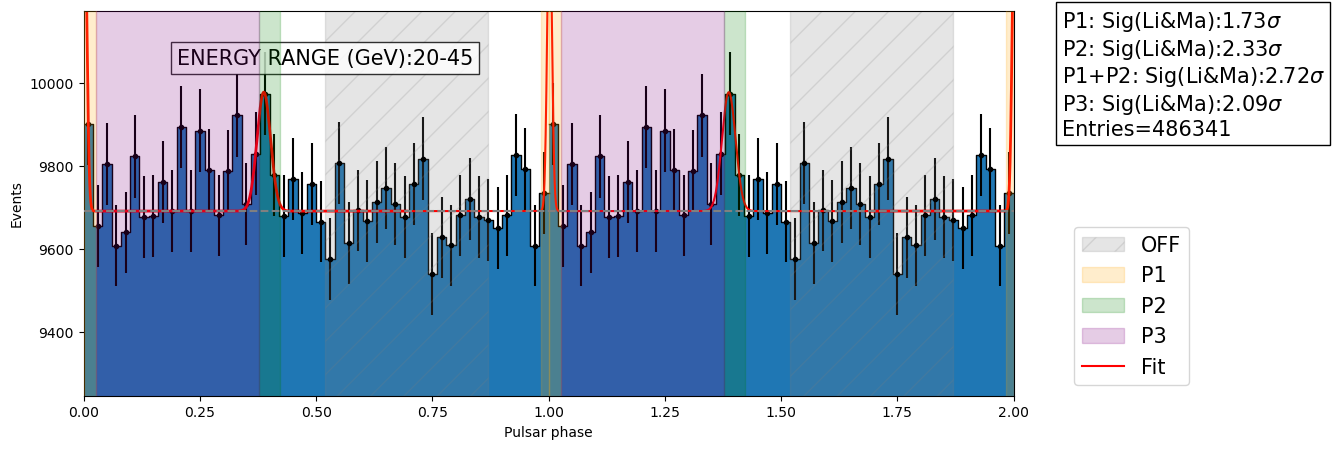

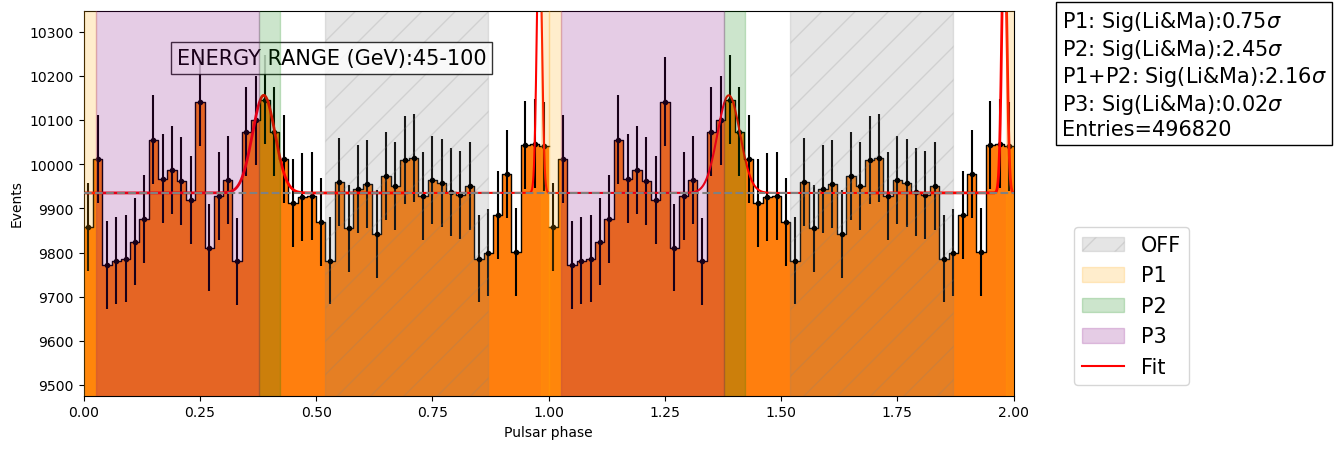

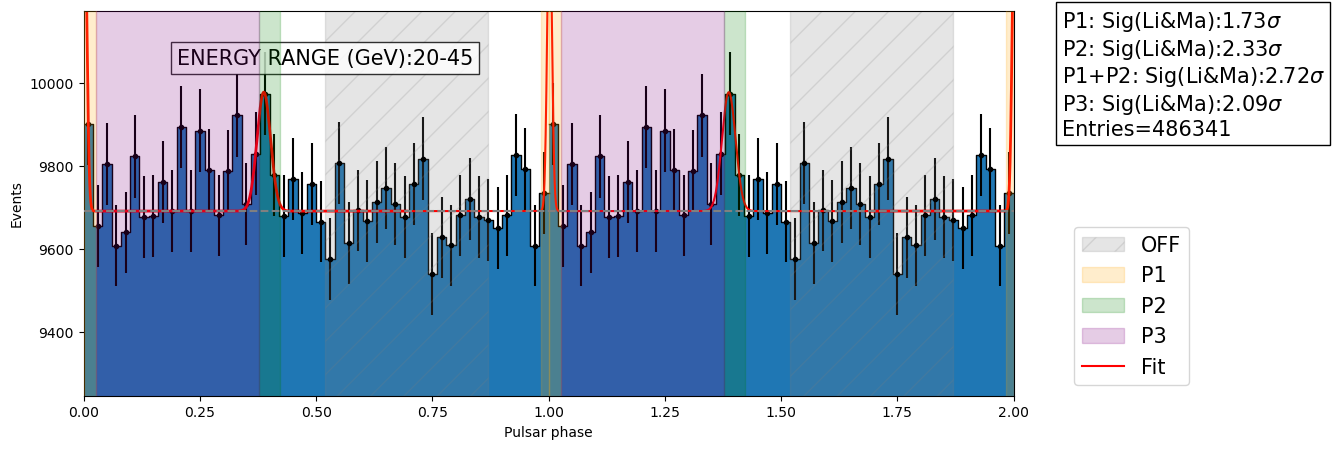

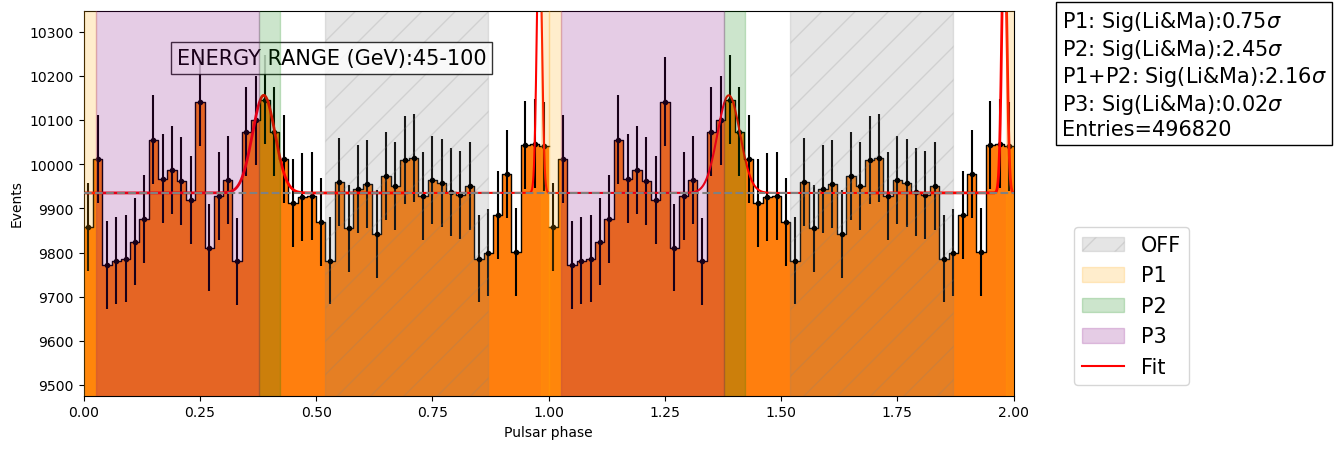

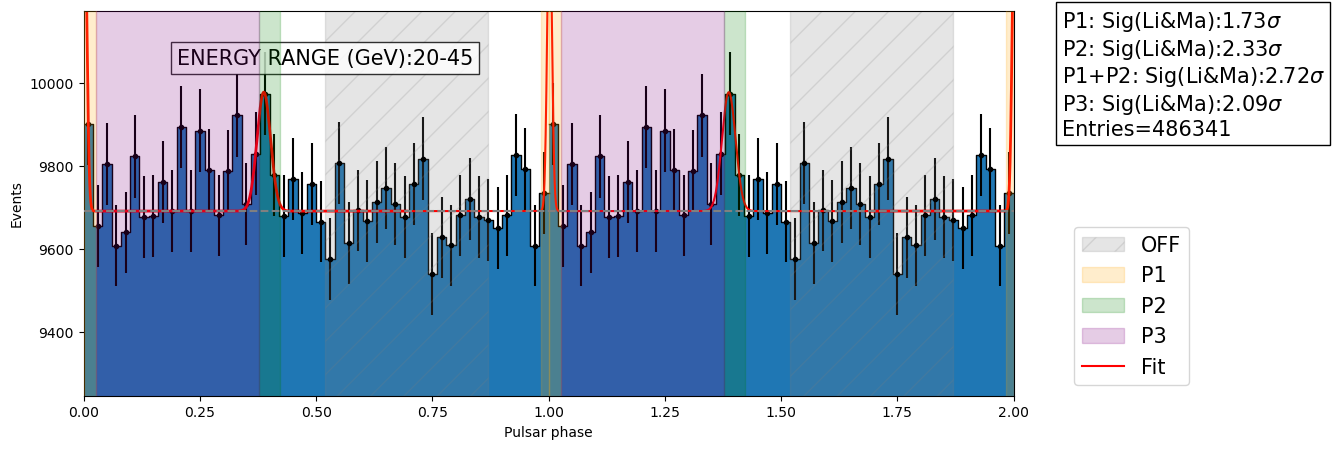

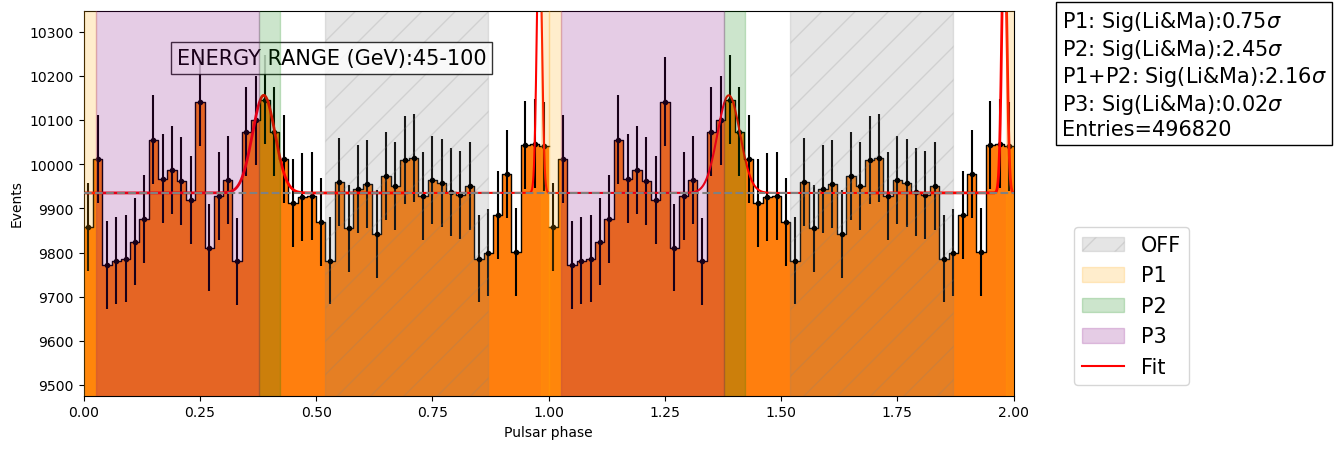

Energies(GeV):20.00-44.72

      Name        Value          Error
0       mu     1.001979      68.330598
1    sigma     0.005059      87.210506
2     mu_2     1.387388       0.005816
3  sigma_2     0.014592       0.005029
4        A  9691.375000       0.000000
5        B     9.341817  440091.073784
6        C    10.472980       3.414780

 

-------------------------------------------------------------------
Energies(GeV):44.72-100.00

      Name        Value          Error
0       mu     0.979921       3.540807
1    sigma     0.005355     119.882554
2     mu_2     1.387339       0.009498
3  sigma_2     0.024300       0.009483
4        A  9935.250000       0.000000
5        B     8.345248  466404.290578
6        C    13.485757       4.563082

 

-------------------------------------------------------------------
Energies(GeV):20.00-44.72

      Name        Value          Error
0       mu     1.001979      68.330598
1    sigma     0.005059      87.210506
2     mu_2     1.387388       0.0

In [9]:
h=PulsarAnalysis() #Create object
h.set_config(config_path) #Set configuration file
h.run() #Run the analysis

The basic results are stores in a pdf in the directory you set in the configuration file. The rest of the plots can be saved in an object manually by the user

In [10]:
!ls $workspace_dir

Compute_phases_pulsar.ipynb  High_level_analysis.ipynb	config.yaml  output


In [11]:
!ls $workspace_dir/output/phaseogram_results

fitting_energy_bin0.h5	fitting_energy_bin1.h5	overall_fitting.h5  results.pdf


### **2.2. Show the results**

#### **2.2.1 Overall results**

Once the analysis is finished one can take a look to the phaseogram and the main statistics for it:

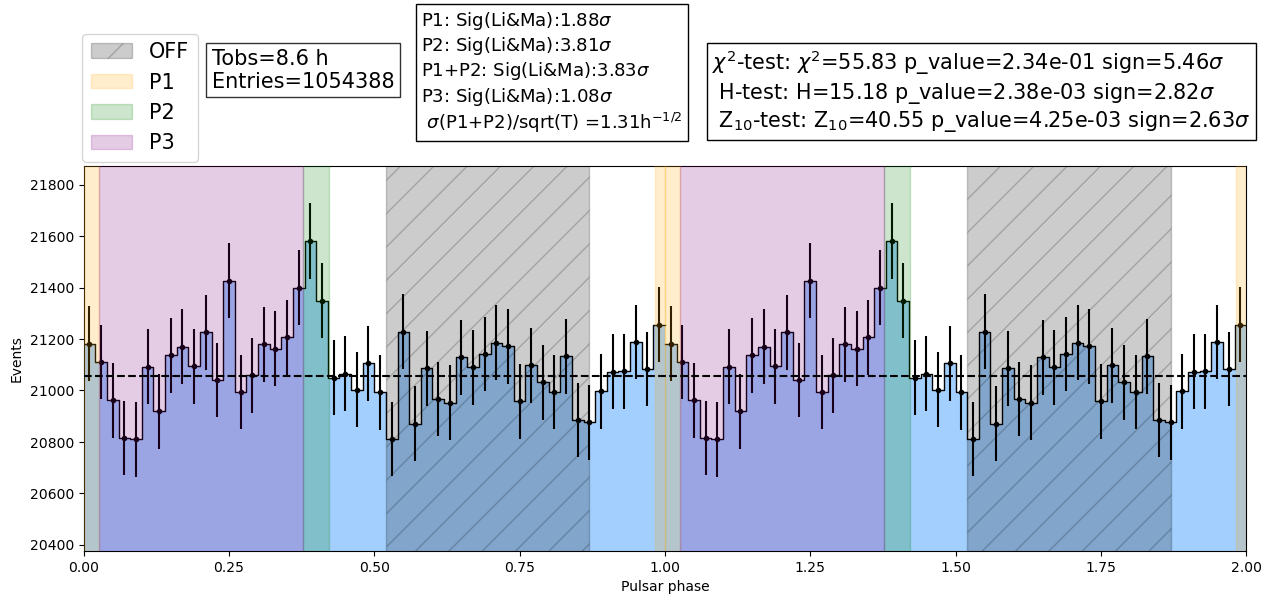

In [12]:
phaseogram=h.draw_phaseogram(phase_limits=[0,2],colorhist='xkcd:baby blue',stats='long')

The phaseogram can be tunned setting some basic parameters:

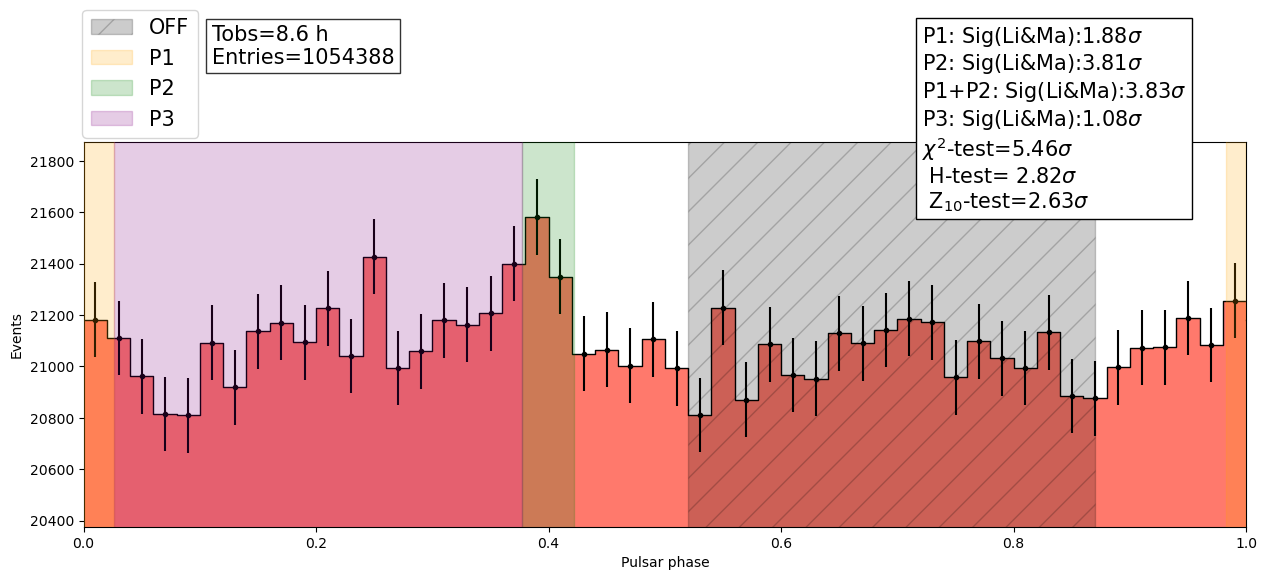

In [13]:
phaseogram=h.draw_phaseogram(phase_limits=[0,1],colorhist='xkcd:salmon',stats='short',hline=False)

The overall results can be printed easily for a fast check:

In [14]:
results_peaks, results_periodicity =h.show_Presults()

RESULTS FOR THE PEAK STATISTICS:

                        P1            P2         P1+P2             P3
Significance      1.882054      3.810448      3.834097       1.080664
Nex             424.911429    883.814286   1308.725714     929.951429
Nex_error       226.320177    233.051180    342.295671     860.536520
Number        45663.000000  48226.000000  93889.000000  370199.000000
noff          45238.088571  47342.185714  92580.274286  369269.048571
sign_t_ratio      0.625778      1.266963      1.274826       0.359318
s/n ratio         1.997774      4.061971      4.301198       1.530343

P1/P2 ratio=0.48+/-0.29


 
RESULTS FOR THE PERIODICITY SEARCH:

                    Chi_square_test    Zn_test    H_test
Statistic                 55.827889  40.552823  15.17743
p-value                    0.233698   0.004250   0.00238
Number of $\sigma$         5.463288   2.631544   2.82283


And extract the dataframes with the values of the peak counts and significances:

In [15]:
results_peaks

,P1,P2,P1+P2,P3
Significance,1.882054,3.810448,3.834097,1.080664
Nex,424.911429,883.814286,1308.725714,929.951429
Nex_error,226.320177,233.051180,342.295671,860.536520
Number,45663.000000,48226.000000,93889.000000,370199.000000
noff,45238.088571,47342.185714,92580.274286,369269.048571
sign_t_ratio,0.625778,1.266963,1.274826,0.359318
s/n ratio,1.997774,4.061971,4.301198,1.530343


And the results of the periodicity tests:

In [16]:
results_periodicity

,Chi_square_test,Zn_test,H_test
Statistic,55.827889,40.552823,15.17743
p-value,0.233698,0.004250,0.00238
Number of $\sigma$,5.463288,2.631544,2.82283


Alternatively, one can also extract the values of interest by accessing to each region statistics h.regions.{name_region}

In [17]:
print(F'Nexcess (P1) {h.regions.P1.Nex:.1F}')
print(f'Significance (P1) {h.regions.P1.sign:.1F}')
print(F'Nexcess (P2) {h.regions.P2.Nex:.1F}')
print(F'Significance (P2) {h.regions.P2.sign:.1F}')

Nexcess (P1) 424.9
Significance (P1) 1.9
Nexcess (P2) 883.8
Significance (P2) 3.8


#### **2.2.2. Result of the fit**

The results of the fit to the phaseogram can also be extracted easily, as well as some basic information:

In [18]:
h.fitting.model

'dgaussian'

In [19]:
fit_result=h.show_fit_results()

      Name         Value     Error
0       mu      0.995731  0.013022
1    sigma      0.017669  0.013156
2     mu_2      1.386201  0.005356
3  sigma_2      0.021311  0.005343
4        A  21057.187500  0.000000
5        B      8.419803  5.391071
6        C     27.268391  5.930300


The output is the dataframe with the values:

In [20]:
fit_result

,Name,Value,Error
0,mu,0.995731,0.013022
1,sigma,0.017669,0.013156
2,mu_2,1.386201,0.005356
3,sigma_2,0.021311,0.005343
4,A,21057.187500,0.000000
5,B,8.419803,5.391071
6,C,27.268391,5.930300


And the phaseogram can also be shown with the best fit obtained from the optimization:

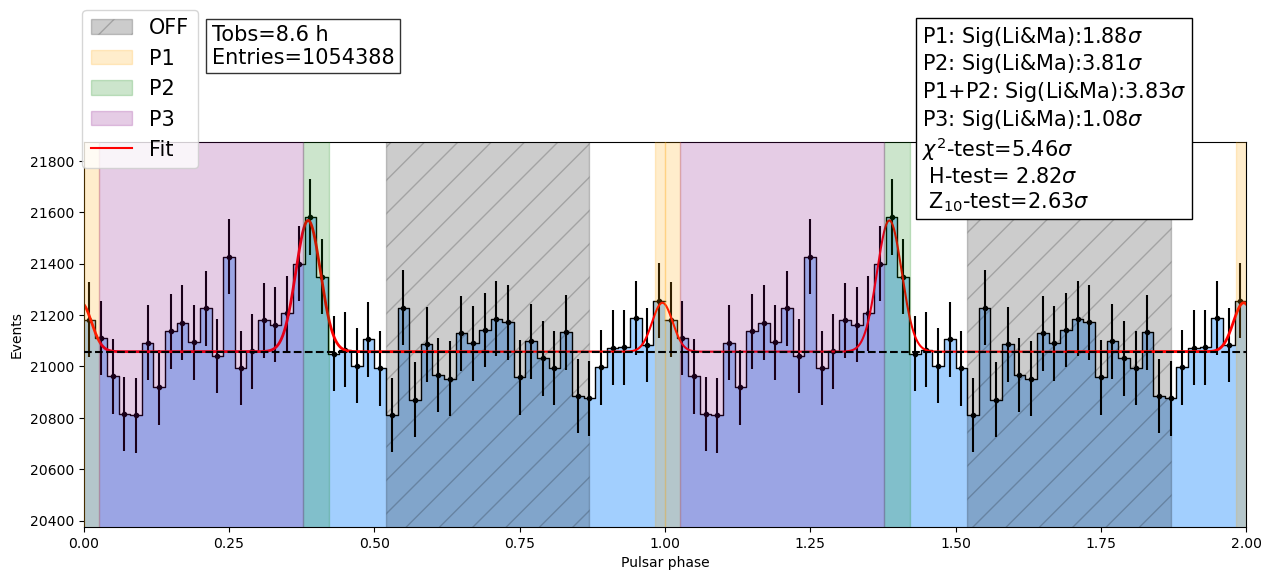

In [21]:
phaseogram=h.draw_phaseogram(phase_limits=[0,2],colorhist='xkcd:baby blue',fit=True)

#### **2.2.3. Results vs Time**

In general, the plot to show the evolution of the signal, Nex, and periodicity tests in time is called using the show_timeEvolution() function:

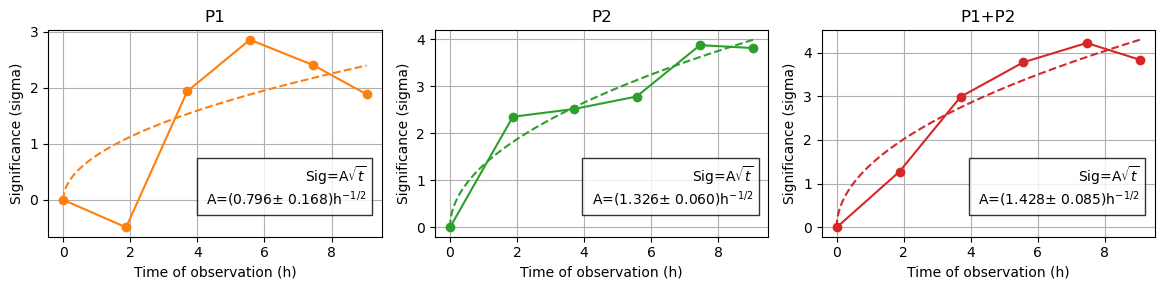

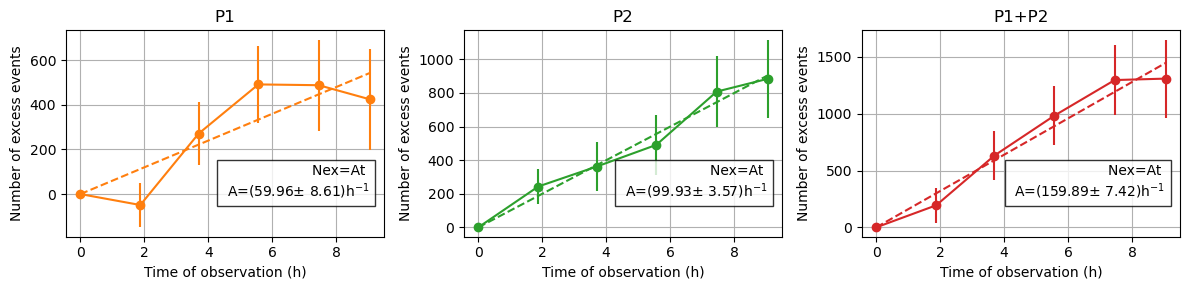

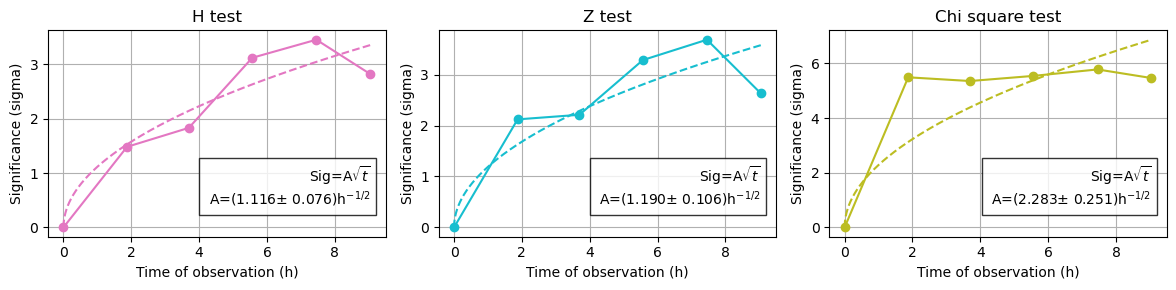

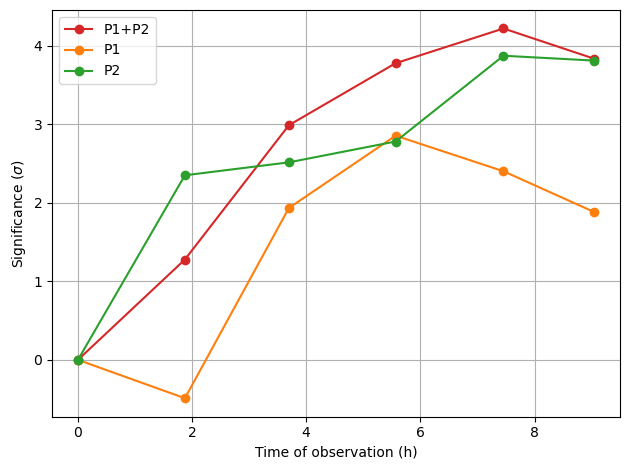

In [22]:
TimeEv=h.show_timeEvolution()

And each figura can be accessed individually:

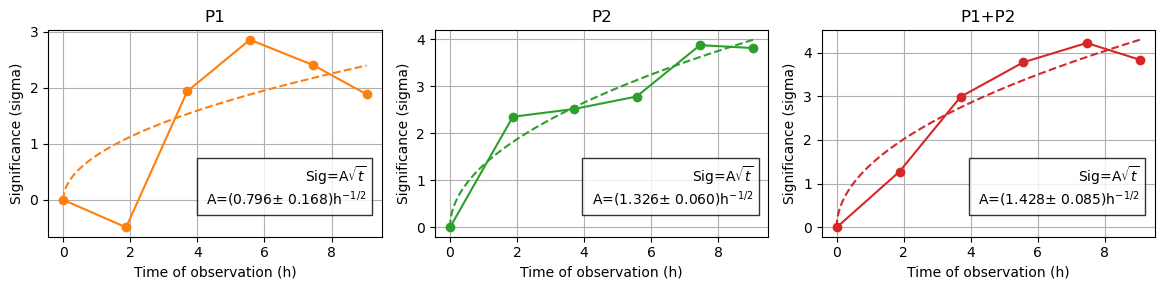

In [23]:
TimeEv[0][0]

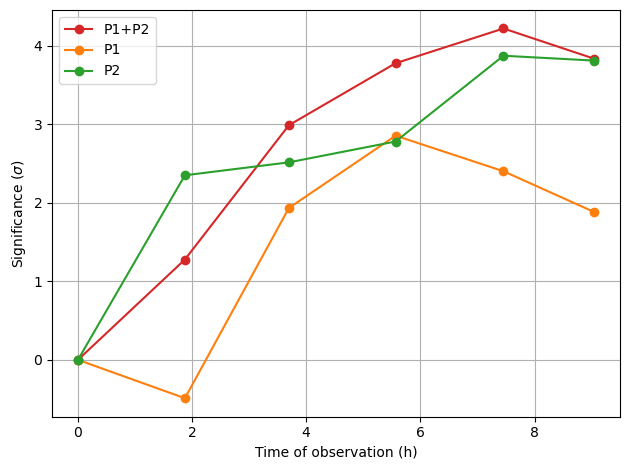

In [24]:
TimeEv[1]

And the value of the point at each time can be also extracted from the h.TimeEv object:

In [25]:
time_binning = h.TimeEv.t
P1_sign = h.TimeEv.P1sTime

Let's draw it to obtain the first figure shown in cell 98:

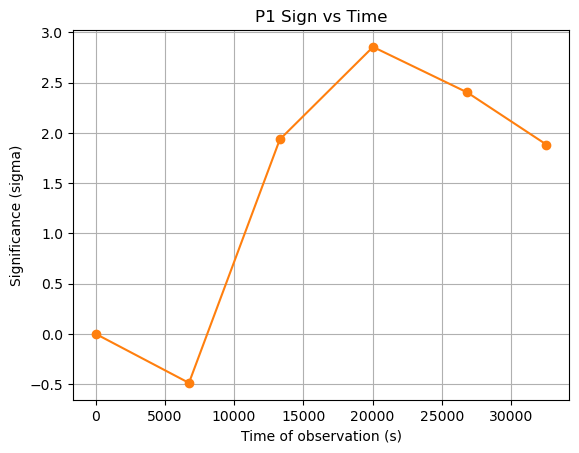

In [26]:
plt.plot(time_binning,P1_sign,'o-',color='C1')
plt.xlabel('Time of observation (s)')
plt.ylabel('Significance (sigma)')
plt.title('P1 Sign vs Time')
plt.grid()

#### **2.2.4. Results vs Energy**

The phaseogram in each energy bin can be depicted using the internal functions of h:

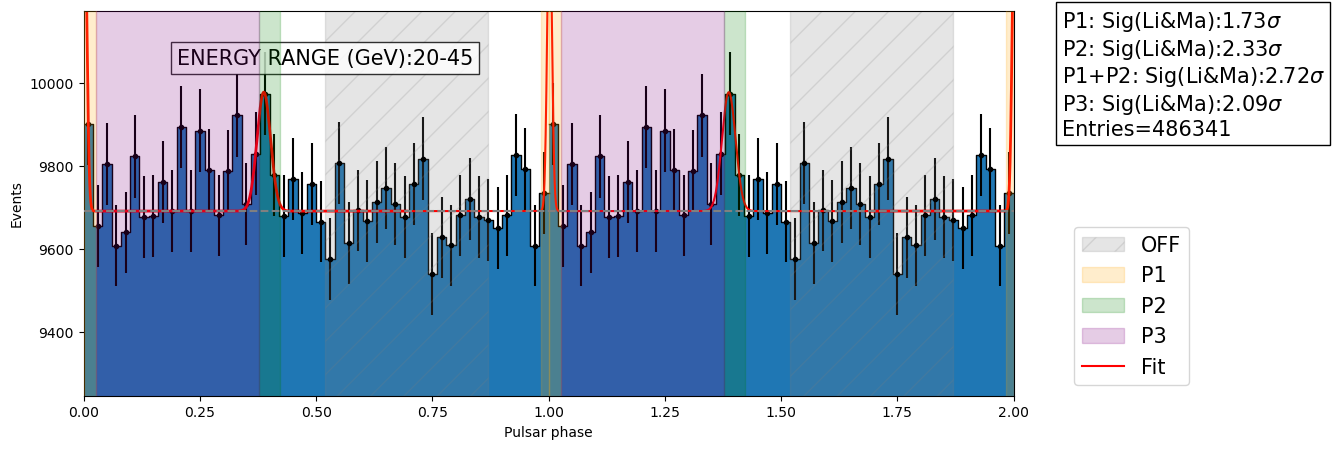

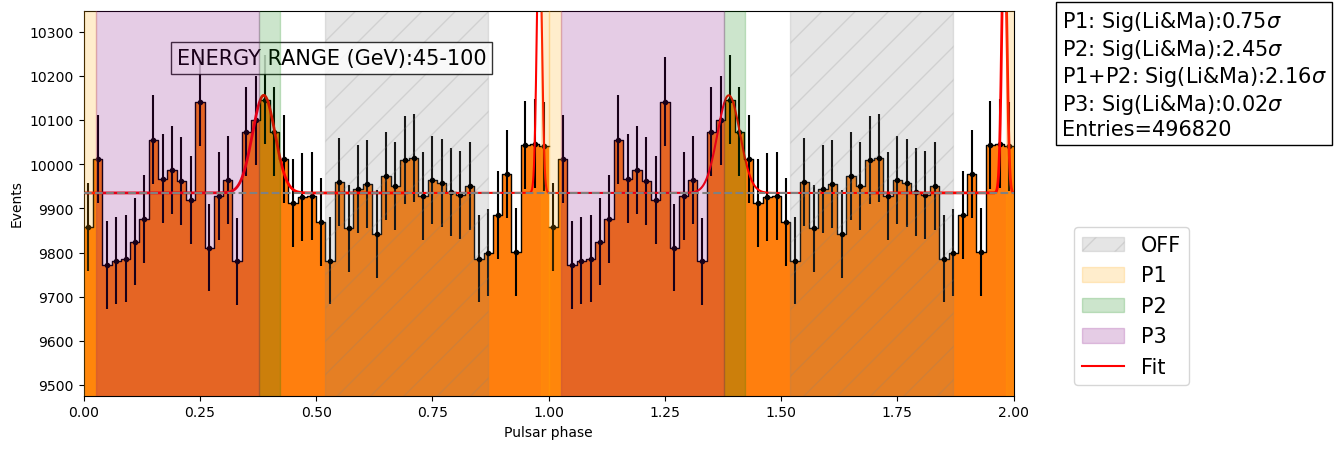

[<Figure size 1200x500 with 1 Axes>, <Figure size 1200x500 with 1 Axes>]

In [27]:
h.show_lcVsEnergy()

By default, the differential ratio is shown (always that is was set do_diff = True in the configuration file). If the integral ratio was also computed (do_integral = True in the configuration file) then one can produce the same plots but showing the integral ratio:

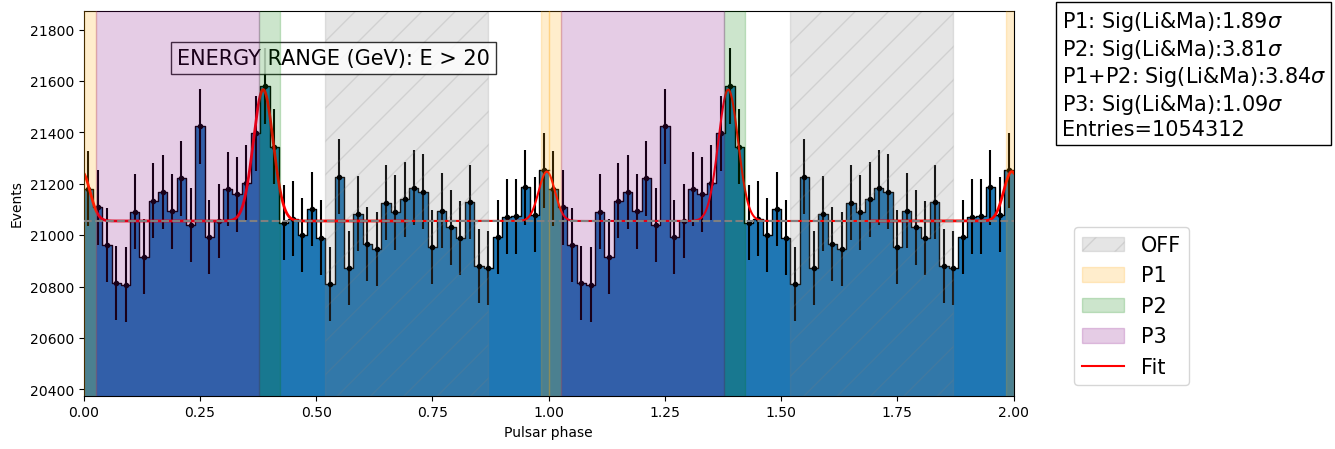

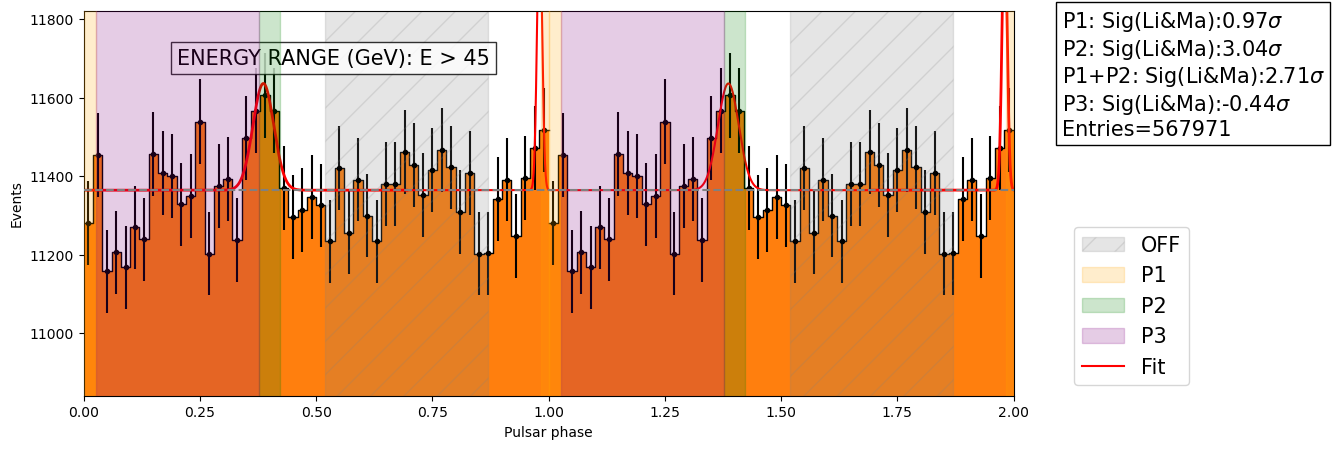

[<Figure size 1200x500 with 1 Axes>, <Figure size 1200x500 with 1 Axes>]

In [28]:
h.show_lcVsEnergy(integral=True)

The results can be shown and extracted using the following function:

In [29]:
energy_results=h.show_EnergyPresults(integral=True)

Energies(GeV):20-45

RESULTS FOR THE PEAK STATISTICS:

                        P1            P2         P1+P2             P3
Significance      1.885162      3.809988      3.835838       1.090098
Nex             425.597143    883.671429   1309.268571     938.037143
Nex_error       226.312548    233.041534    342.282675     860.506206
Number        45660.000000  48222.000000  93882.000000  370177.000000
noff          45234.402857  47338.328571  92572.731429  369238.962857
sign_t_ratio      0.626831      1.266851      1.275446       0.362466
s/n ratio         2.001079      4.061480      4.303157       1.543712

P1/P2 ratio=0.48+/-0.29


 
RESULTS FOR THE PERIODICITY SEARCH:

                    Chi_square_test    Zn_test     H_test
Statistic                 55.833620  40.571837  15.156706
p-value                    0.233536   0.004226   0.002400
Number of $\sigma$         5.463411   2.633441   2.820185

 

-------------------------------------------------------------------
Energies(GeV):4

And access to the dataframe with the statistics in each bin:

In [30]:
peak_stats_bin1 = energy_results[0][0]
peak_stats_bin2 = energy_results[0][1]

In [31]:
print(f'First bin of energy: {h.EnergyAna.energy_edges[0]*1000:.1f} GeV - {h.EnergyAna.energy_edges[1]*1000:.1f} GeV')
peak_stats_bin1

First bin of energy: 20.0 GeV - 44.7 GeV


,P1,P2,P1+P2,P3
Significance,1.885162,3.809988,3.835838,1.090098
Nex,425.597143,883.671429,1309.268571,938.037143
Nex_error,226.312548,233.041534,342.282675,860.506206
Number,45660.000000,48222.000000,93882.000000,370177.000000
noff,45234.402857,47338.328571,92572.731429,369238.962857
sign_t_ratio,0.626831,1.266851,1.275446,0.362466
s/n ratio,2.001079,4.061480,4.303157,1.543712


In [32]:
print(f'Second bin of energy: {h.EnergyAna.energy_edges[1]*1000:.1f} GeV - {h.EnergyAna.energy_edges[2]*1000:.1f} GeV')
peak_stats_bin2

Second bin of energy: 44.7 GeV - 100.0 GeV


,P1,P2,P1+P2,P3
Significance,0.970922,3.035705,2.705569,-0.444567
Nex,160.951429,517.414286,678.365714,-280.768571
Nex_error,166.055534,171.324099,251.404624,631.555349
Number,24575.000000,26067.000000,50642.000000,199006.000000
noff,24414.048571,25549.585714,49963.634286,199286.768571
sign_t_ratio,0.431306,1.348530,1.201876,-0.197487
s/n ratio,1.030089,3.237028,3.034848,-0.628940


And some basic plots can also be accessed:

/fefs/aswg/software/virtual_env/ctasoft/PulsarTimingAnalysis/ptiming_ana/phaseogram/penergy_analysis.py:352: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/fefs/aswg/software/virtual_env/ctasoft/PulsarTimingAnalysis/ptiming_ana/phaseogram/penergy_analysis.py:504: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/fefs/aswg/software/virtual_env/ctasoft/PulsarTimingAnalysis/ptiming_ana/phaseogram/pulsar_analysis.py:467: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


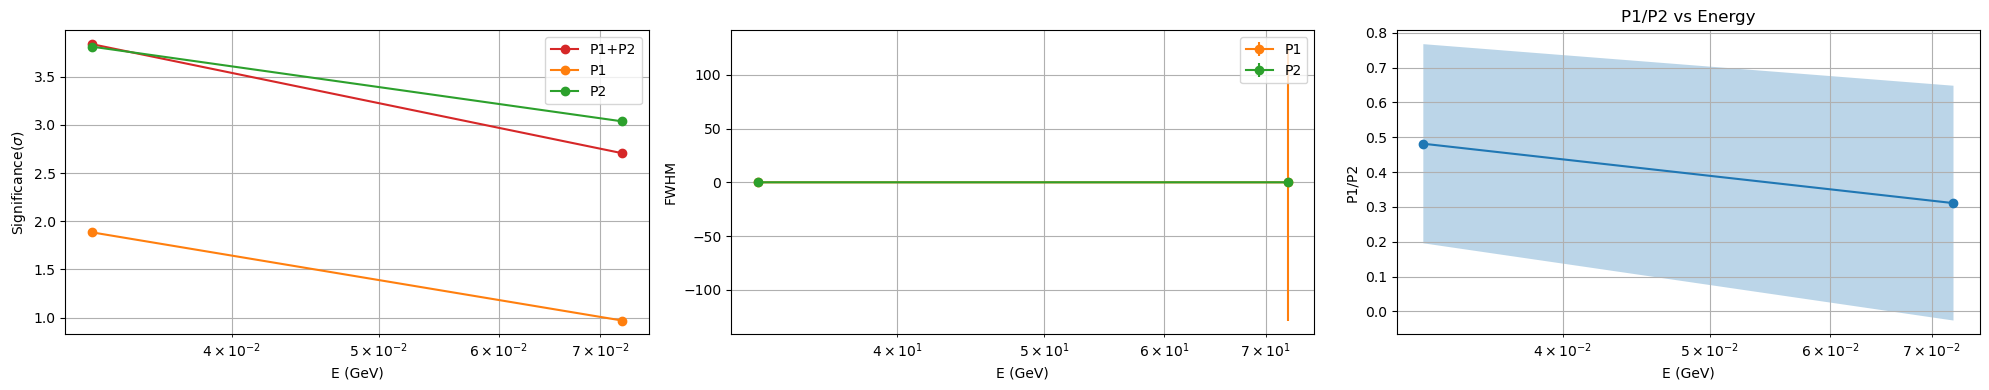

In [33]:
energy_plots=h.show_EnergyAna(integral=True)

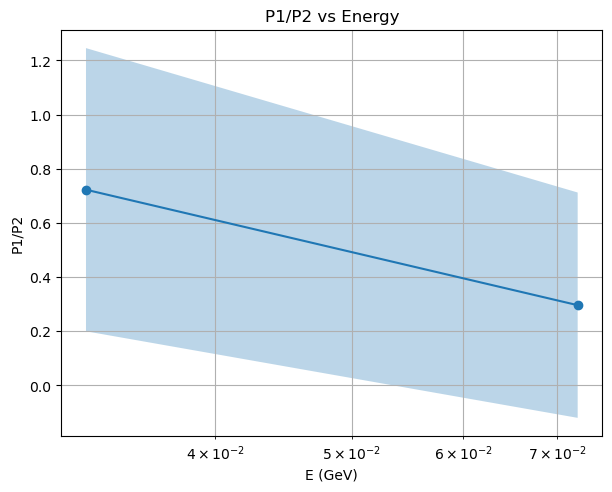

In [34]:
p1p2_plot = h.show_P1P2VsEnergy()

#### **2.2.5 Fit vs Energy**

The results of the fit in the different energy ranges can also be explores using some pre-defined functions:

/fefs/aswg/software/virtual_env/ctasoft/PulsarTimingAnalysis/ptiming_ana/phaseogram/penergy_analysis.py:604: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


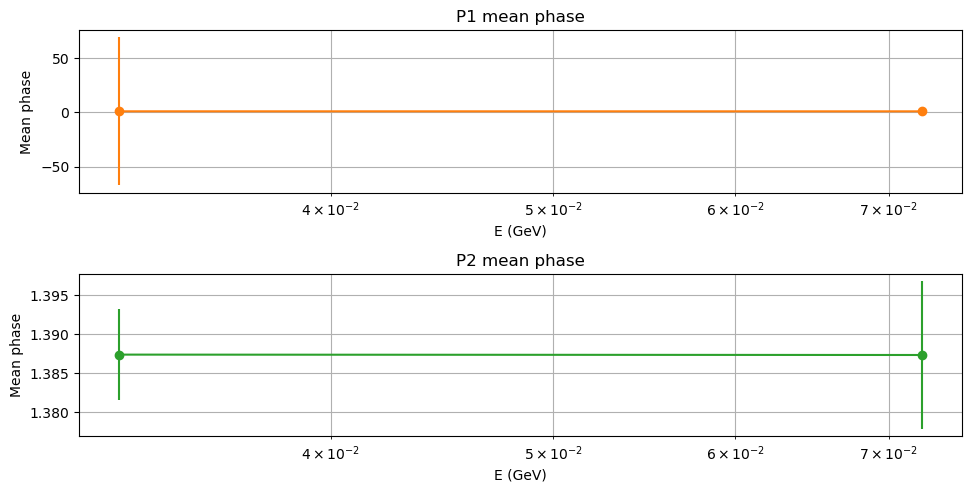

In [35]:
mean_energy_plot=h.show_meanVsEnergy()

And, again, show all the results in the different energy ranges:

In [36]:
fit_results_vs_energy = h.show_EnergyFitresults()

Energies(GeV):20.00-44.72

      Name        Value          Error
0       mu     1.001979      68.330598
1    sigma     0.005059      87.210506
2     mu_2     1.387388       0.005816
3  sigma_2     0.014592       0.005029
4        A  9691.375000       0.000000
5        B     9.341817  440091.073784
6        C    10.472980       3.414780

 

-------------------------------------------------------------------
Energies(GeV):44.72-100.00

      Name        Value          Error
0       mu     0.979921       3.540807
1    sigma     0.005355     119.882554
2     mu_2     1.387339       0.009498
3  sigma_2     0.024300       0.009483
4        A  9935.250000       0.000000
5        B     8.345248  466404.290578
6        C    13.485757       4.563082

 

-------------------------------------------------------------------


And, as for the other cases, one can extract the dataframes that store the fitted parameters for each energy bin:

In [37]:
fit_enerybin1 = fit_results_vs_energy[0]
fit_energybin2 = fit_results_vs_energy[1]

In [38]:
fit_enerybin1

,Name,Value,Error
0,mu,1.001979,68.330598
1,sigma,0.005059,87.210506
2,mu_2,1.387388,0.005816
3,sigma_2,0.014592,0.005029
4,A,9691.375000,0.000000
5,B,9.341817,440091.073784
6,C,10.472980,3.414780


In [39]:
fit_energybin2

,Name,Value,Error
0,mu,0.979921,3.540807
1,sigma,0.005355,119.882554
2,mu_2,1.387339,0.009498
3,sigma_2,0.024300,0.009483
4,A,9935.250000,0.000000
5,B,8.345248,466404.290578
6,C,13.485757,4.563082


## **3. Spectral fit and  SED**

Let's import the functions for the spectral analysis. We need basically the following ones:

In [40]:
from ptiming_ana.spectral.spectra import SpectralPulsarAnalysis
from gammapy.modeling.models import PowerLawSpectralModel
import astropy.units as u
import matplotlib.pyplot as plt

The pulsar tools include one module called 'spectral' to obtain the SED of the pulsars and fir them to Power Law models. It is based on gammapy. The user can run the tools by calling to the SpectralPulsarAnalysis() object and setting the configuration file. From that object the user can access to the main results and all the the Gammapy objects, including SpectralModels, FluxPoints, Datasets, etc. To get familiar with these classes one should take a look to the Gammapy documentation: https://docs.gammapy.org/1.1/


### **3.1. Run the code**

First we need to define a reference model that will be used as the initial one for the fit. This reference model has to be given as a SpectralModel object (defined in Gammapy). For instance, for a PowerLaw, typically used in pulsars at VHE, one can use the following model:

In [41]:
ref_model_P2 = PowerLawSpectralModel(index=3.2, 
                                        amplitude=1.1e-11 * u.Unit("1 / (cm2 s TeV)"), 
                                        reference=0.04 * u.TeV)


And now we have to create the SpectralPulsarAnalysis, which is the main object, and set the reference model and the configuration file as follows:

In [42]:
spectra_P2 = SpectralPulsarAnalysis(ref_model = ref_model_P2)
spectra_P2.init_settings(configuration_file=config_path)

2024-02-21 15:29:34 INFO   [ptiming_ana.spectral.spectra] Reading configuration file
2024-02-21 15:29:34 INFO   [ptiming_ana.spectral.config_reading] Reading general settings from configuration file
2024-02-21 15:29:34 INFO   [ptiming_ana.spectral.config_reading] Creating directory: ./output/OGIP/
2024-02-21 15:29:34 INFO   [ptiming_ana.spectral.config_reading] Creating directory: ./output/spectral_results/
2024-02-21 15:29:34 INFO   [ptiming_ana.spectral.config_reading] Reading fitting parameters from configuration file
2024-02-21 15:29:34 INFO   [ptiming_ana.spectral.config_reading] Reading spectral points parameters from configuration file


Now we are ready to run the analysis:

2024-02-21 15:29:52 INFO   [ptiming_ana.spectral.spectra] Information about the source. Name: Crab, RA: 83.633deg, DEC: 22.01deg
2024-02-21 15:29:52 INFO   [gammapy.data.data_store] Observations selected: 34 out of 34.
2024-02-21 15:29:52 INFO   [ptiming_ana.spectral.spectra] Setting given reference model
2024-02-21 15:29:53 INFO   [ptiming_ana.spectral.spectra] The Signal phase region is: (0.377, 0.422)
2024-02-21 15:29:53 INFO   [ptiming_ana.spectral.spectra] The Background phase region is: (0.52, 0.87)
2024-02-21 15:29:53 INFO   [ptiming_ana.spectral.spectra] Gammapy makers prepared for analysis
2024-02-21 15:29:53 INFO   [ptiming_ana.spectral.spectra] Executing analysis...
2024-02-21 15:29:53 INFO   [ptiming_ana.spectral.gammapy_utils] Executing analysis for run number 2914
/fefs/aswg/software/conda/envs/lst-school-2024-02-pulsar-analysis/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_uf

RESULTS of the fitting:

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : True
	message    : Optimization terminated successfully..
	nfev       : 132
	total stat : 4.38

CovarianceResult

	backend    : minuit
	method     : hesse
	success    : True
	message    : Hesse terminated successfully.



model,type,name,value,unit,error,min,max,frozen,is_norm,link
str4,str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
Crab,spectral,index,3.1121e+00,,5.018e-01,nan,nan,False,False,
Crab,spectral,amplitude,1.3866e-09,TeV-1 s-1 cm-2,4.592e-10,nan,nan,False,True,
Crab,spectral,reference,4.0000e-02,TeV,0.000e+00,nan,nan,True,False,



Flux points using e2dnde format
       e_ref               e_min         ...        norm_scan                        stat_scan                
        TeV                 TeV          ...                                                                  
------------------- -------------------- ... ------------------------ ----------------------------------------
0.02585234839562192 0.019952623149688802 ... 0.2 .. 4.999999999999999  0.09123740979703143 .. 51.9421353629441
0.04731512589614808 0.033496543915782793 ... 0.2 .. 4.999999999999999  7.856060116318986 .. 47.570326464716345
0.08659643233600657   0.0668343917568615 ... 0.2 .. 4.999999999999999 1.8366541936411522 .. 20.702686680131592
 0.1453784385607663  0.11220184543019641 ... 0.2 .. 4.999999999999999 0.5799251571515924 .. 28.025484571553534


2024-02-21 15:30:28 WARNING [matplotlib.legend] No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Covariance matrix data:

[[2.51794874e-01 3.11491791e-11 0.00000000e+00]
 [3.11491791e-11 2.10876736e-19 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

Total Correlation matrix:



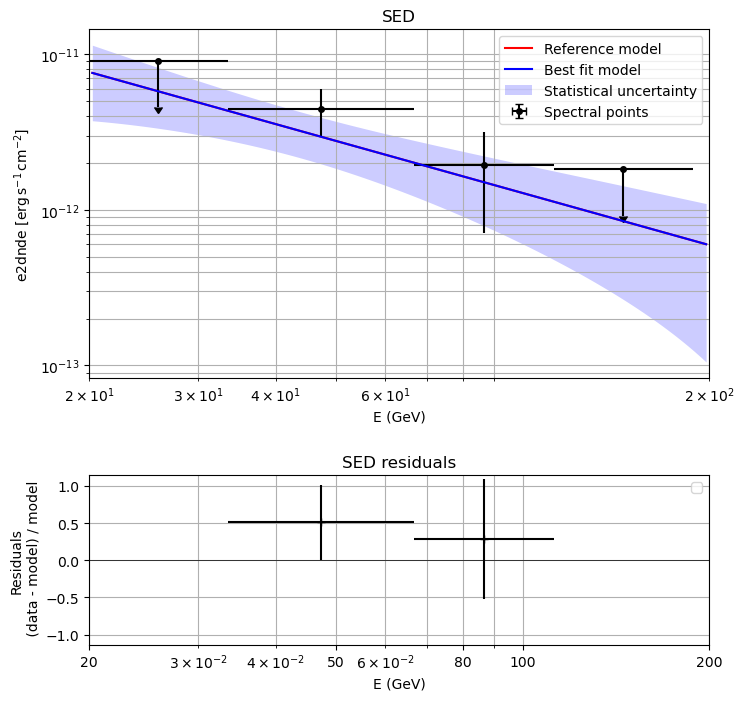

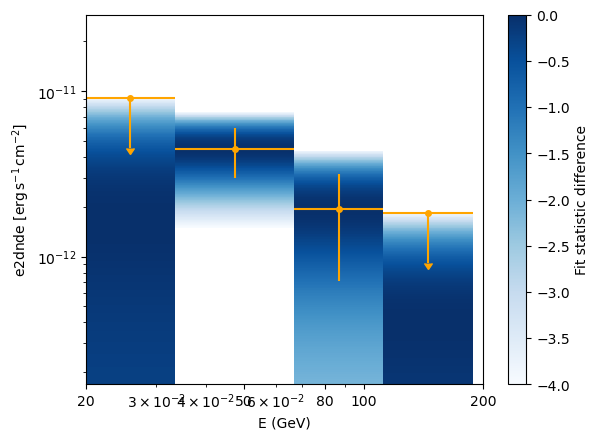

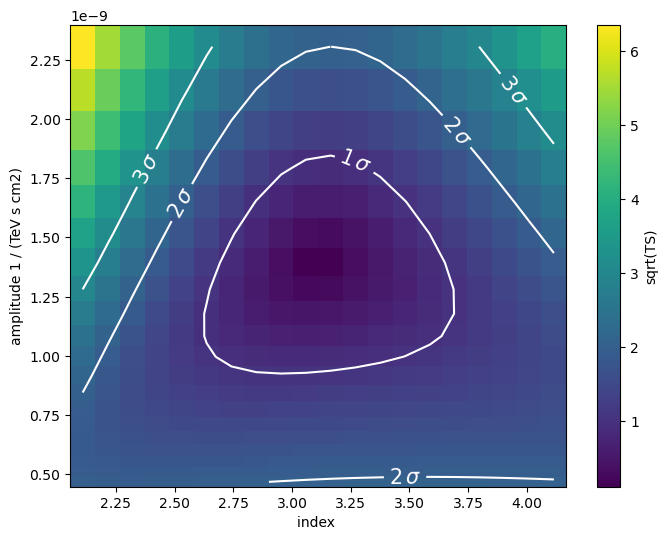

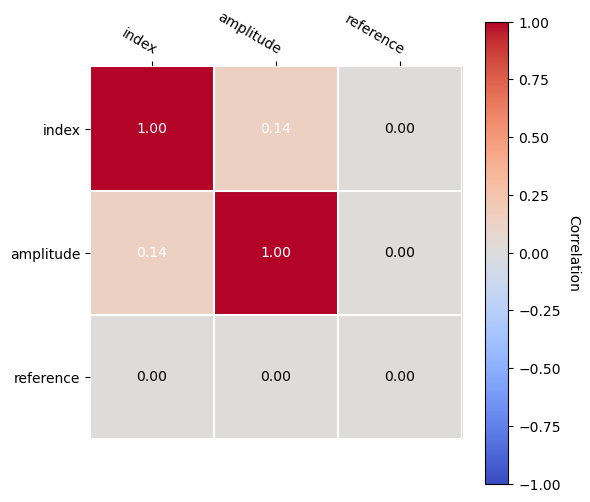

<Figure size 240x195 with 0 Axes>

In [43]:
spectra_P2.run('P2')

It finished sucessfully so now we can explore the results! There are a lot of Warnings from Gammmapy, most of them can be ignored.

### **3.2. Explore the results**

#### **3.2.1. Plotting the SED and showing the residuals**

One can show the SED of the data with the fitted model

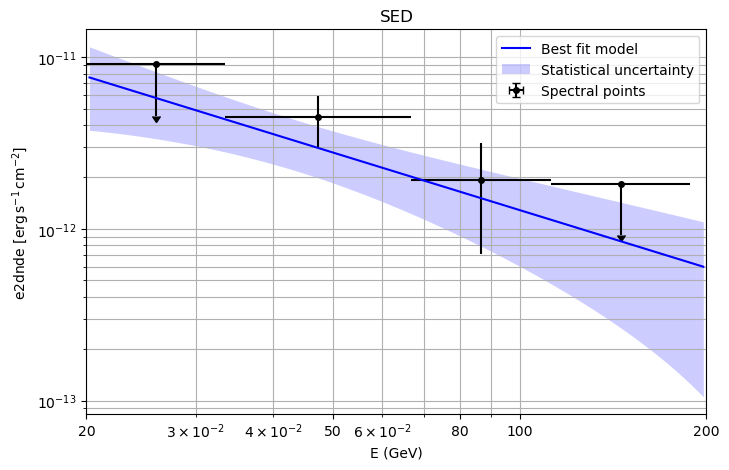

In [44]:
spectra_P2.plot_SED()

And we can tune the SED to produce a more clear and appealing plot:

/tmp/ipykernel_2631/483640999.py:6: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(1e-13,1-11)


Text(0.5, 1.0, 'LST-1 P2 SED')

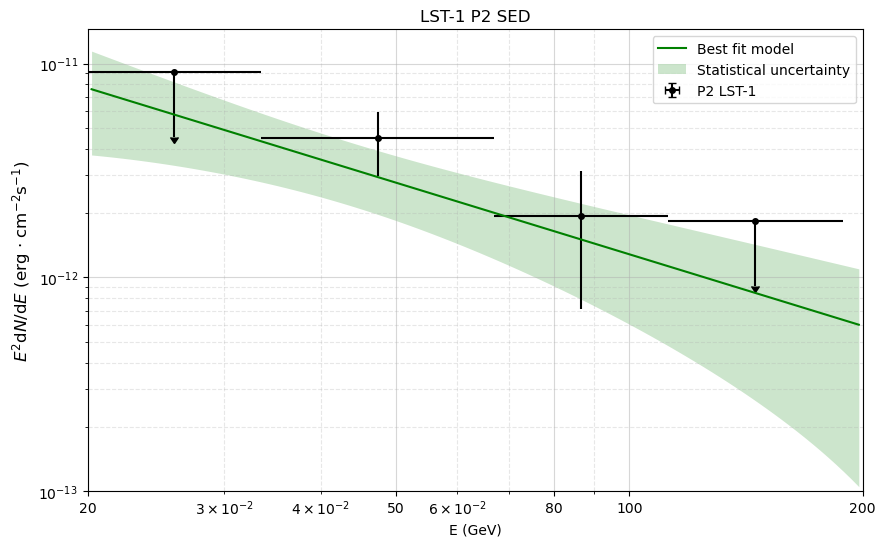

In [45]:
fig,ax = plt.subplots(figsize=(10,6))
spectra_P2.plot_SED(ax,color_fp = 'black', color_model = 'green',label_fp = 'P2 LST-1')
ax.grid(which='major',alpha=0.5)
ax.grid(which='minor',linestyle='dashed',alpha=0.3)
ax.set_ylabel(f'$E^{2}$d$N$/d$E$ (erg $\cdot$ cm$^{{-2}}$s$^{{-1}}$)',fontsize=12)
ax.set_ylim(1e-13,1-11)
ax.set_xlim(0.02,0.2)
ax.set_title('LST-1 P2 SED')

If one needs to access to the residuals, there is another function to get them:

2024-02-21 15:31:08 WARNING [matplotlib.legend] No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


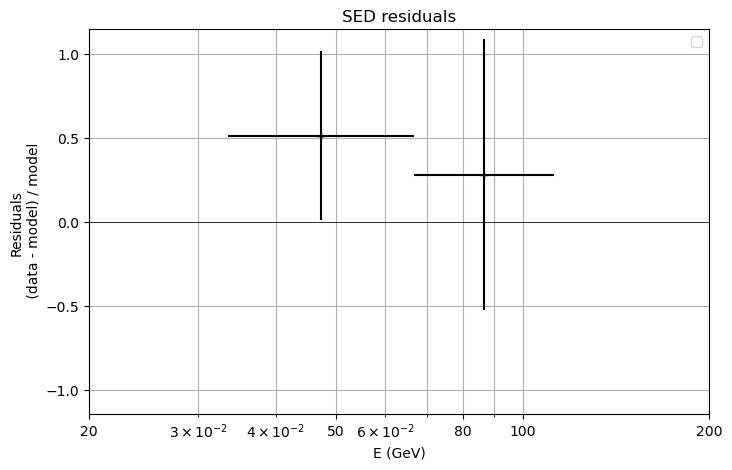

In [46]:
spectra_P2.plot_residuals()

#### **3.2.2. Checking the Fitted model**

Extract the parameters of the fitted model is easy if we extract the SpectralModel object and use the gammapy functions:

In [47]:
spectral_model_info = spectra_P2.model_best.spectral_model.parameters.to_table()

In [48]:
spectral_model_info

type,name,value,unit,error,min,max,frozen,is_norm,link
str8,str9,float64,str14,float64,float64,float64,bool,bool,str1
spectral,index,3.1121e+00,,5.018e-01,nan,nan,False,False,
spectral,amplitude,1.3866e-09,TeV-1 s-1 cm-2,4.592e-10,nan,nan,False,True,
spectral,reference,4.0000e-02,TeV,0.000e+00,nan,nan,True,False,


And check the covariance matrix:


Covariance matrix data:

[[2.51794874e-01 3.11491791e-11 0.00000000e+00]
 [3.11491791e-11 2.10876736e-19 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

Total Correlation matrix:



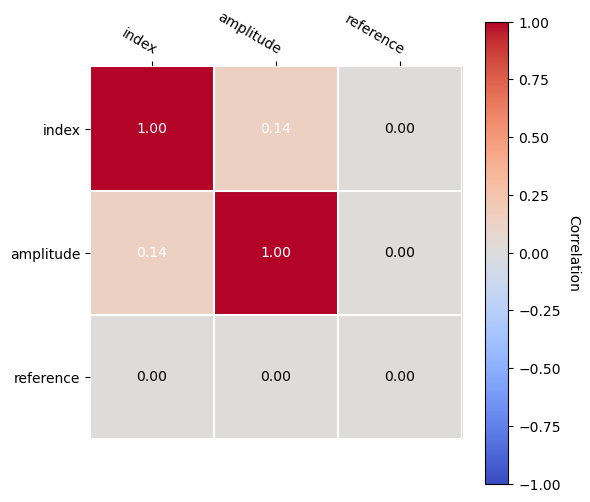

<Figure size 240x195 with 0 Axes>

In [49]:
spectra_P2.get_covariance_matrix()

And plot, for instance, the contour plots of the parameters:

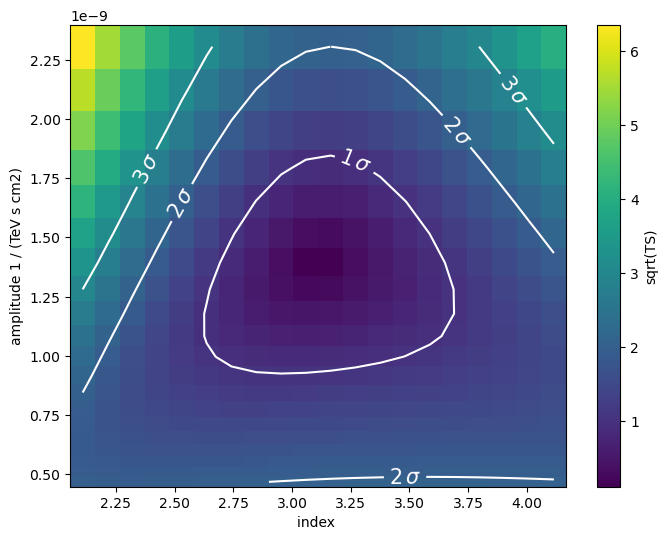

In [22]:
spectra_P2.create_contour_lines_params()

#### **3.3.3 Extracting the Flux Points**

One can also extract the gammapy FluxPoints objects:

In [50]:
flux_points_table = spectra_P2.flux_points.to_table('e2dnde')

In [51]:
flux_points_table

e_ref,e_min,e_max,e2dnde,e2dnde_err,e2dnde_errp,e2dnde_errn,e2dnde_ul,ts,sqrt_ts,npred,npred_excess,stat,is_ul,counts,success,norm_scan,stat_scan
TeV,TeV,TeV,TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),TeV / (s cm2),,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64[1],float32[1],float64,bool,float64[1],bool,float64[11],float64[11]
0.02585234839562192,0.019952623149688802,0.033496543915782793,1.0431356829480342e-12,2.306177285402124e-12,2.3132801969879823e-12,nan,5.6836535225141194e-12,0.20505674666492268,0.4528319187788364,8655.824916710426,44.08834,0.07173643162241206,True,8652.0,True,0.2 .. 4.999999999999999,0.09123740979703143 .. 51.9421353629441
0.04731512589614808,0.033496543915782793,0.0668343917568615,2.7859844294854846e-12,9.294580504250281e-13,9.308539826466263e-13,9.278585389717169e-13,4.655386041441674e-12,9.10490717808716,3.01743387302641,30257.147646707337,549.1929,1.003575225127861,False,30246.0,True,0.2 .. 4.999999999999999,7.856060116318986 .. 47.570326464716345
0.08659643233600657,0.0668343917568615,0.11220184543019641,1.2036753459003458e-12,7.596290365231911e-13,7.616241713218018e-13,7.577067234475689e-13,2.7315934954795247e-12,2.5343746861908585,1.5919719489334159,11686.621364641951,180.84288,0.03387649805517867,False,11685.0,True,0.2 .. 4.999999999999999,1.8366541936411522 .. 20.702686680131592
0.1453784385607663,0.11220184543019641,0.1883649089489802,2.4435988118111415e-13,4.4305987539198295e-13,4.4555019885181325e-13,nan,1.1433179324295414e-12,0.31338002545089694,0.5598035596983079,3501.1363151085243,32.93983,0.47739352712233085,True,3495.0,True,0.2 .. 4.999999999999999,0.5799251571515924 .. 28.025484571553534


And we can also check for example, if there are UL in our data and their significance:

In [52]:
flux_points_table['is_ul']

True
False
False
True


In [53]:
flux_points_table['sqrt_ts']

0.4528319187788364
3.01743387302641
1.5919719489334159
0.5598035596983079


Evidently, we have very low statistics for a SED, so in general all the flux points are UL

#### **3.3.4. Checking the outputs**

After the execution of the analysis, the results are saved in the results directory given in the configuration file. In addition, if the save_DL4 flag was set to True, these files will be saved in the DL4 directory. If you check your workspace directory the DL4 directory should have been created and the DL4 files should be stored in it.

Next time you execute the analysis, you can set use_DL4=True in the config file so that the data reduction does not need to be redone again (always that you examine the same phase region).

In [54]:
!ls {workspace_dir}

Compute_phases_pulsar.ipynb  High_level_analysis.ipynb	config.yaml  output


In [56]:
!ls {workspace_dir}/output/spectral_results/

SED.png				  correlation.png
contour_line_index_amplitude.png  likelihood_profile.png


In [57]:
!ls {workspace_dir}/output/OGIP

obs_2914.fits.gz      obs_2934_bkg.fits.gz  obs_2972.fits.gz
obs_2914_arf.fits.gz  obs_2934_rmf.fits.gz  obs_2972_arf.fits.gz
obs_2914_bkg.fits.gz  obs_2949.fits.gz	    obs_2972_bkg.fits.gz
obs_2914_rmf.fits.gz  obs_2949_arf.fits.gz  obs_2972_rmf.fits.gz
obs_2919.fits.gz      obs_2949_bkg.fits.gz  obs_2973.fits.gz
obs_2919_arf.fits.gz  obs_2949_rmf.fits.gz  obs_2973_arf.fits.gz
obs_2919_bkg.fits.gz  obs_2950.fits.gz	    obs_2973_bkg.fits.gz
obs_2919_rmf.fits.gz  obs_2950_arf.fits.gz  obs_2973_rmf.fits.gz
obs_2922.fits.gz      obs_2950_bkg.fits.gz  obs_2974.fits.gz
obs_2922_arf.fits.gz  obs_2950_rmf.fits.gz  obs_2974_arf.fits.gz
obs_2922_bkg.fits.gz  obs_2959.fits.gz	    obs_2974_bkg.fits.gz
obs_2922_rmf.fits.gz  obs_2959_arf.fits.gz  obs_2974_rmf.fits.gz
obs_2923.fits.gz      obs_2959_bkg.fits.gz  obs_2975.fits.gz
obs_2923_arf.fits.gz  obs_2959_rmf.fits.gz  obs_2975_arf.fits.gz
obs_2923_bkg.fits.gz  obs_2961.fits.gz	    obs_2975_bkg.fits.gz
obs_2923_rmf.fits.gz  obs_2961_arf.fits.gz  o

## **4. Exercises to practice**

1. Change the bridge definition to the [0.14-0.25] and check if the signal increases. Check the number of Nex, Non and Noff
2. Extract the lightcurve above 80 GeV and check the significance of each peak.
3. Use a 'double_lorentz' model instead of a double gaussian to fit the phaseogram. Check the results.
4. Compute the spectra for P1, produce 3 flux points between 20 and 200 GeV and extract the significance of each point.